In [1]:
!pip install seaborn --upgrade

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import warnings

In [3]:
path = "C:\\Users\91861\OneDrive\Desktop\dissertaion\cervical_cancer.csv"
data = pd.read_csv(path)
data.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,...,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,...,?,?,0,0,0,0,0,0,0,0


# 1) Descriptive statistics

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [5]:
data.skew()

C:\Users\91861\AppData\Local\Temp\ipykernel_21168\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


Age                          1.394279
STDs: Number of diagnosis    3.794990
Dx:Cancer                    6.696629
Dx:CIN                       9.626413
Dx:HPV                       6.696629
Dx                           5.735307
Hinselmann                   4.651067
Schiller                     2.952873
Citology                     4.075796
Biopsy                       3.565519
dtype: float64

In [18]:
data.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
data.var()

C:\Users\91861\AppData\Local\Temp\ipykernel_12764\445316826.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.var()


Age                          72.215121
STDs: Number of diagnosis     0.091533
Dx:Cancer                     0.020563
Dx:CIN                        0.010392
Dx:HPV                        0.020563
Dx                            0.027221
Hinselmann                    0.039174
Schiller                      0.078900
Citology                      0.048709
Biopsy                        0.060063
dtype: float64

In [20]:
data.kurt()

C:\Users\91861\AppData\Local\Temp\ipykernel_12764\2907027414.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.kurt()


Age                           4.778575
STDs: Number of diagnosis    17.456839
Dx:Cancer                    42.944934
Dx:CIN                       90.879657
Dx:HPV                       42.944934
Dx                           30.965922
Hinselmann                   19.678286
Schiller                      6.735152
Citology                     14.646251
Biopsy                       10.737951
dtype: float64

In [21]:
data.corr()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,-0.001606,0.110340,0.061443,0.101722,0.092635,-0.003967,0.103283,-0.016862,0.055956
STDs: Number of diagnosis,-0.001606,1.000000,-0.015423,0.008070,-0.015423,-0.002289,0.076787,0.130873,0.055114,0.097449
Dx:Cancer,0.110340,-0.015423,1.000000,-0.015072,0.886508,0.665647,0.134264,0.157812,0.113446,0.160905
Dx:CIN,0.061443,0.008070,-0.015072,1.000000,-0.015072,0.606939,-0.021233,0.009119,-0.023938,0.113172
Dx:HPV,0.101722,-0.015423,0.886508,-0.015072,1.000000,0.616327,0.134264,0.157812,0.113446,0.160905
Dx,0.092635,-0.002289,0.665647,0.606939,0.616327,1.000000,0.072215,0.098952,0.088740,0.157607
Hinselmann,-0.003967,0.076787,0.134264,-0.021233,0.134264,0.072215,1.000000,0.650249,0.192467,0.547417
Schiller,0.103283,0.130873,0.157812,0.009119,0.157812,0.098952,0.650249,1.000000,0.361486,0.733204
Citology,-0.016862,0.055114,0.113446,-0.023938,0.113446,0.088740,0.192467,0.361486,1.000000,0.327466
Biopsy,0.055956,0.097449,0.160905,0.113172,0.160905,0.157607,0.547417,0.733204,0.327466,1.000000


<AxesSubplot:>

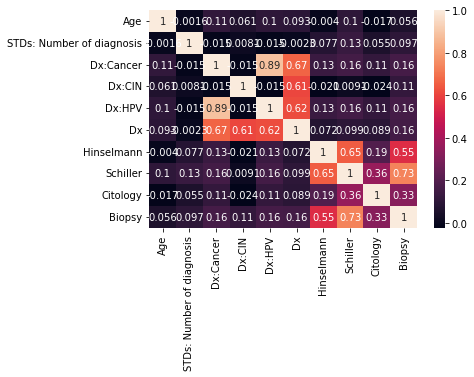

In [22]:
sns.heatmap(data.corr(), annot=True)

**Exploratory Data analysis**

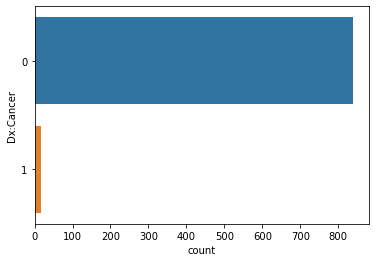

In [23]:
sns.countplot(data=data, y='Dx:Cancer');

<AxesSubplot:ylabel='Age'>

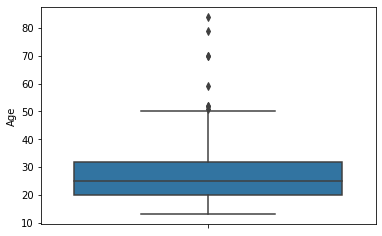

In [24]:
sns.boxplot(y='Age', data = data)

<AxesSubplot:>

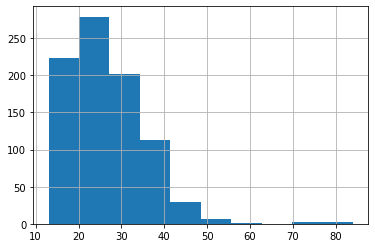

In [25]:
data.Age.hist()

C:\Users\91861\AppData\Local\Temp\ipykernel_12764\2317092479.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


<AxesSubplot:xlabel='Age', ylabel='Density'>

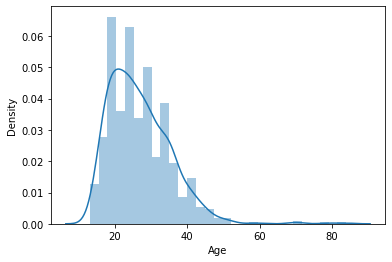

In [26]:
sns.distplot(data['Age'])

<AxesSubplot:xlabel='Age', ylabel='Smokes'>

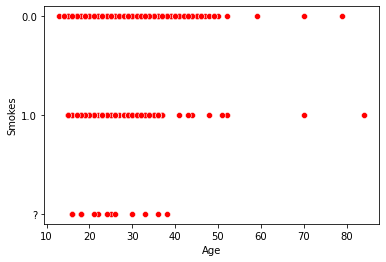

In [40]:
sns.scatterplot(x='Age', y='Smokes', data=data, color= 'red')

In [41]:
from sklearn.preprocessing import LabelEncoder

# Numerical features


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [43]:
# select numerical features
features_num = ['Age', 'Dx:CIN','Dx:HPV','Dx','Hinselmann','Schiller','Biopsy']

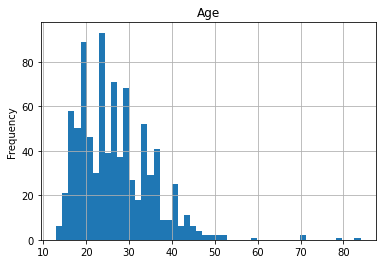

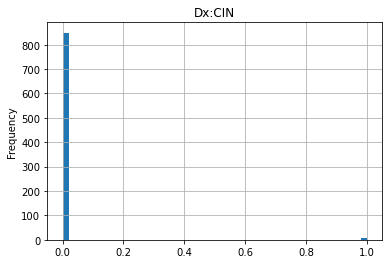

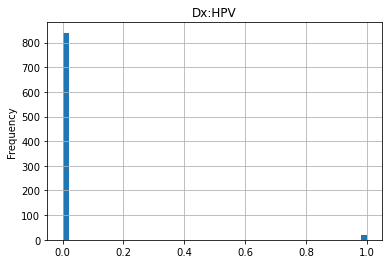

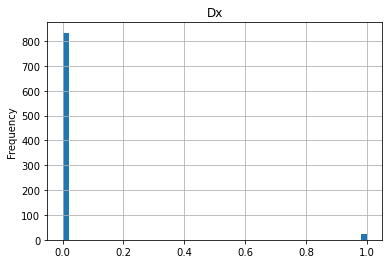

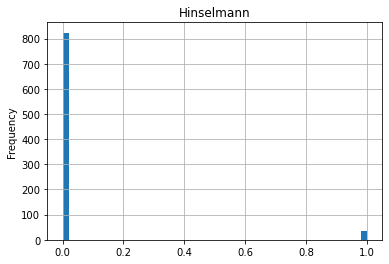

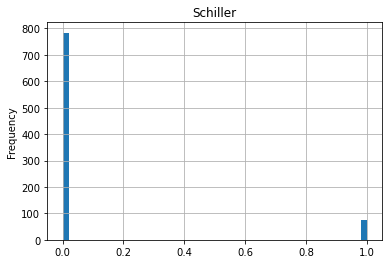

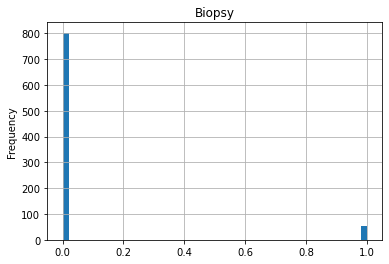

In [44]:
# plot distribution of numerical features
for f in features_num:
    data[f].plot(kind='hist', bins=50)
    plt.title(f)
    plt.grid()
    plt.show()

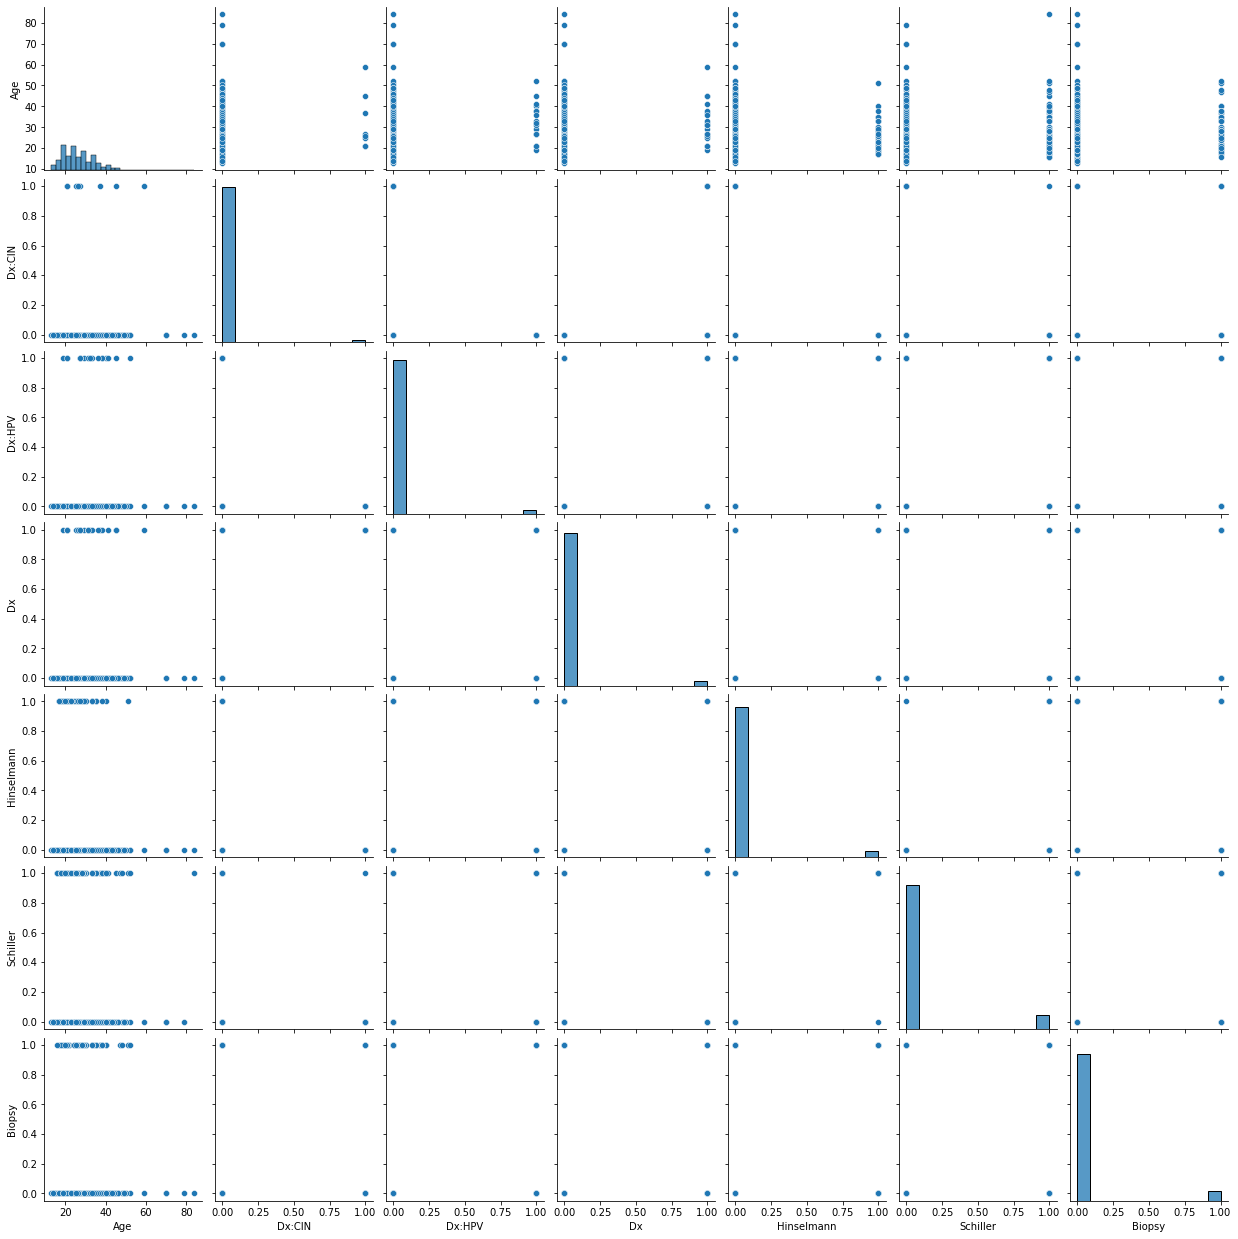

In [46]:
# pairwise scatter plot
sns.pairplot(data[features_num])
plt.show()

Categorical values

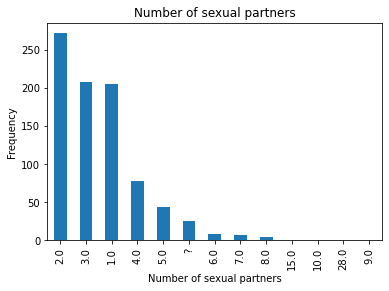

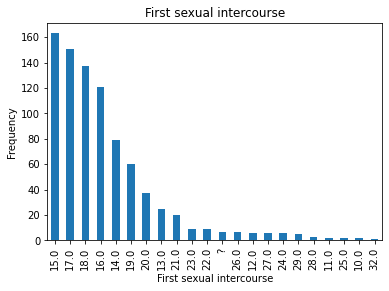

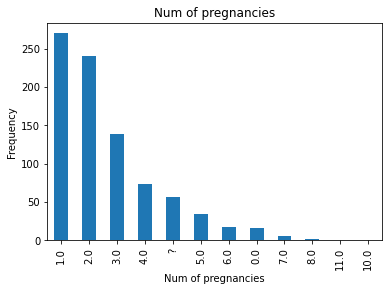

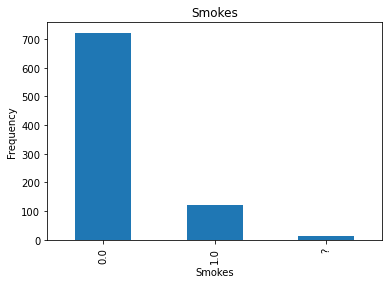

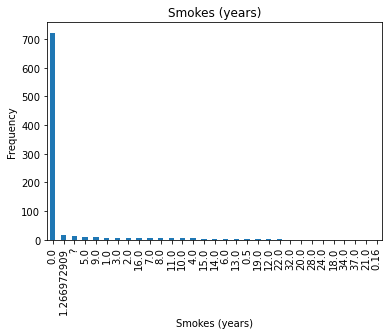

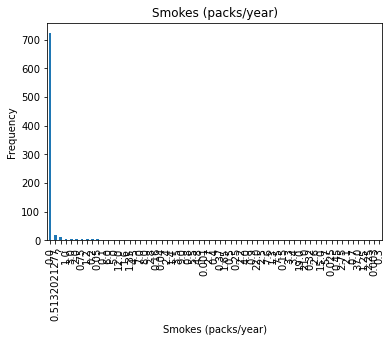

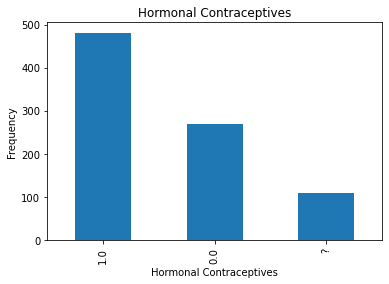

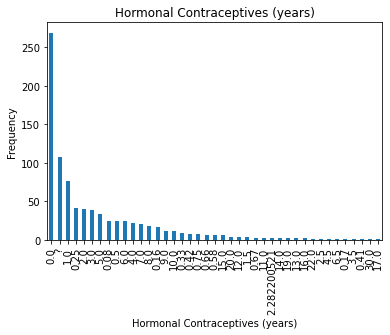

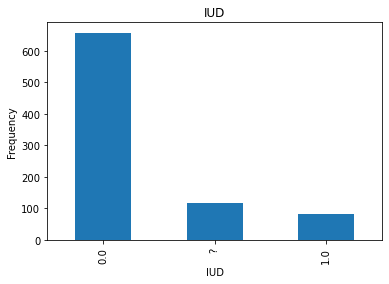

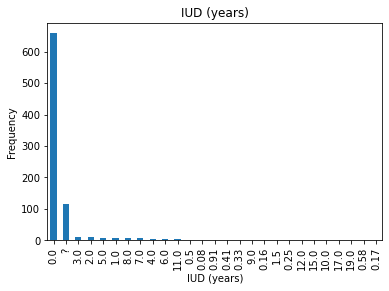

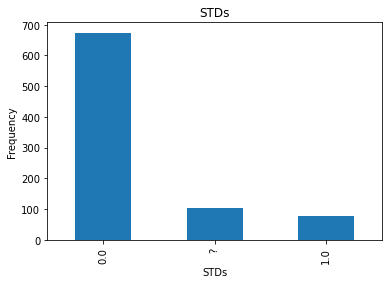

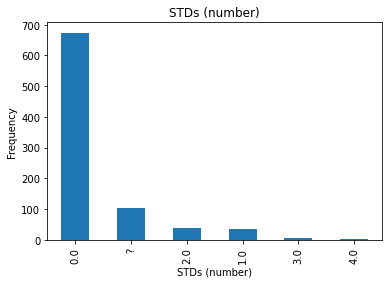

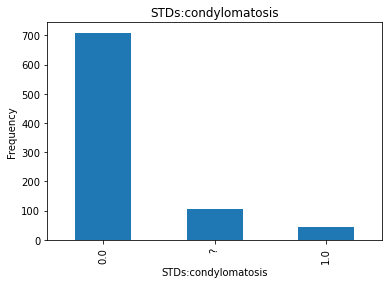

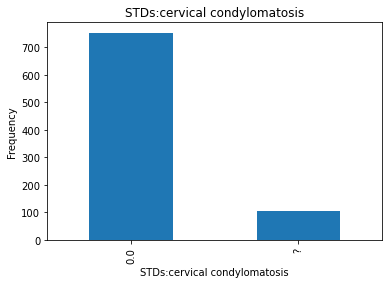

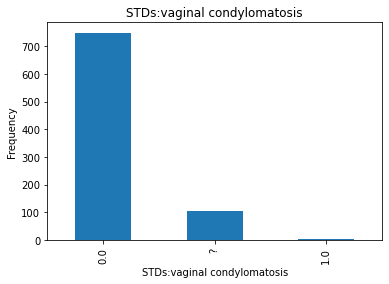

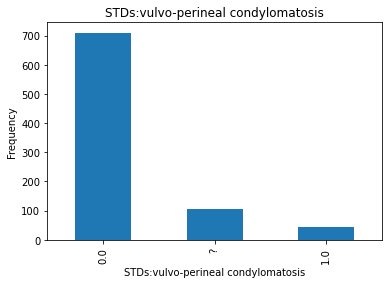

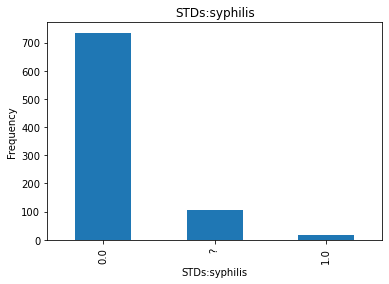

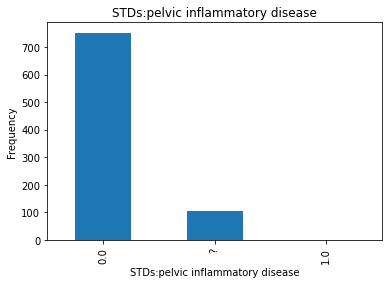

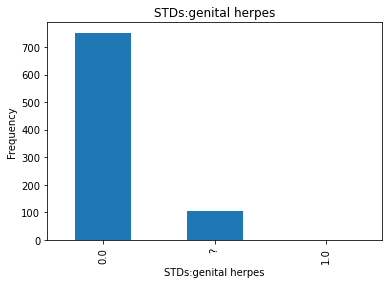

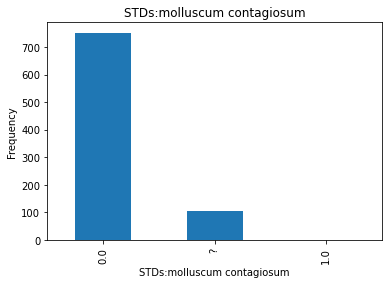

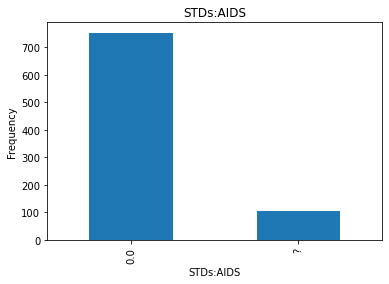

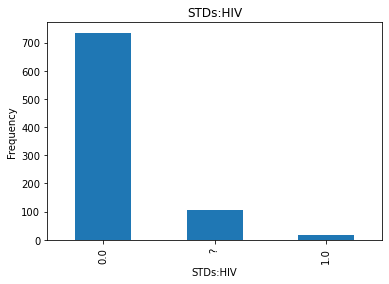

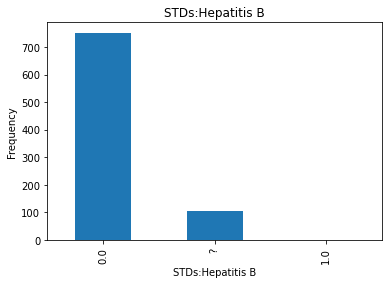

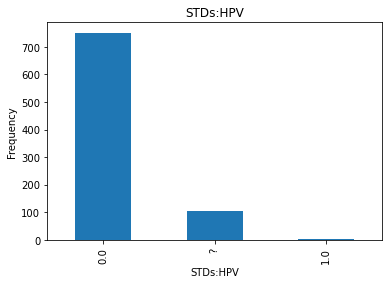

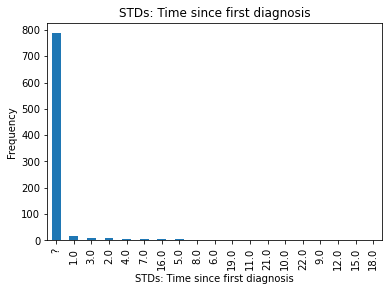

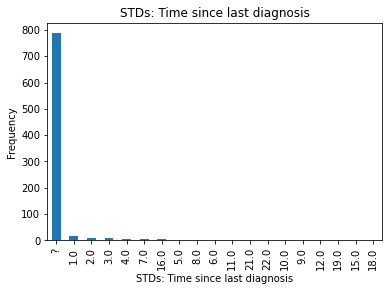

In [48]:
for col in data.select_dtypes(include=["object"]):
    # Create histogram plot
    data[col].value_counts().plot(kind="bar")
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# 3) Data Preprocessing

## - Missing values, Standardize, Encoding <br>
Let's import the dataset again.

In [ ]:
data.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [ ]:
le = LabelEncoder()

# Loop through all columns in the DataFrame
for col in data.columns:
    # Check if the data type of the column is object
    if data[col].dtype == 'object':
        # Fit and transform the LabelEncoder on the column
        data[col] = le.fit_transform(data[col])

# Display the transformed DataFrame
print(data)

     Age  Number of sexual partners  First sexual intercourse  \
0     18                          6                         5   
1     15                          0                         4   
2     34                          0                        21   
3     52                          7                         6   
4     46                          5                        11   
..   ...                        ...                       ...   
853   34                          5                         8   
854   32                          3                         9   
855   25                          3                         7   
856   33                          3                        14   
857   29                          3                        10   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0                     1       0               0                    0   
1                     1       0               0                    0   
2  

In [49]:
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object